In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

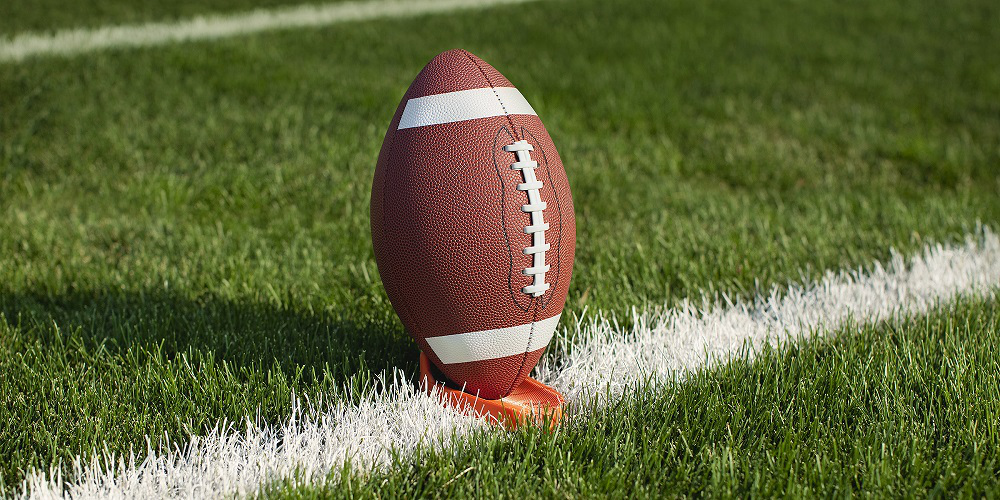

In [89]:
from PIL import Image
img =Image.open("img/superbowl.jpg")
img

### **Loading my data**

In [2]:
advert = pd.read_csv("original_data/superbowl_commercials.csv")
data_dict = pd.read_csv("original_data/data_dictionary.csv")

### **Getting to know my data**

In [3]:
data_dict

,Field,Description
0,Year,"Year the spot aired, according to superbowl-ad..."
1,Brand,Brand of advertiser
2,Superbowl Ads Link,Link to superbowl-ads.com entry for this ad
3,YouTube Link,Link to a YouTube video for this ad (if this f...
4,Funny,"Was it trying to be funny?�Is the ad jokey, go..."
5,Shows Product Quickly,Did it show the product right away?�Can you te...
6,Patriotic,Was it patriotic?�Did the commercial make a pa...
7,Celebrity,Did it feature a celebrity?�If we saw a celebr...
8,Danger,Did it involve danger?�Did we see any violence...
9,Animals,Did it include animals?�Did an animal � either...


In [4]:
advert.sample(n=5,random_state=42)

,Year,Brand,Superbowl Ads Link,Youtube Link,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
137,2012,Pepsi,https://superbowl-ads.com/2012-pepsi-kings-court/,https://www.youtube.com/watch?v=3rZs8ZKTsp0,False,True,False,True,False,False,False,60,5.90,583919.0,1500.0,111.35
6,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-whaasup/,https://www.youtube.com/watch?v=JJmqCKtJnxM,True,True,False,False,False,False,False,60,4.20,4047977.0,31000.0,88.47
97,2009,Budweiser,https://superbowl-ads.com/2009-budweiser-clyde...,https://www.youtube.com/watch?v=ukpnHh4eEeQ,False,True,True,False,False,True,False,60,4.80,307483.0,538.0,98.73
60,2005,Bud Light,https://superbowl-ads.com/2005-bud-light-cedri...,https://www.youtube.com/watch?v=Q5Hu_FBUIsk,True,True,False,True,False,True,True,30,2.40,3515.0,7.0,86.07
112,2010,Bud Light,https://superbowl-ads.com/hd-exclusive-bud-lig...,https://www.youtube.com/watch?v=agISXMN4tng,True,False,False,False,True,False,True,30,2.95,3851.0,10.0,106.48


In [5]:
advert.columns

Index(['Year', 'Brand', 'Superbowl Ads Link', 'Youtube Link', 'Funny',
       'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals',
       'Uses Sex', 'Length', 'Estimated Cost', 'Youtube Views',
       'Youtube Likes', 'TV Viewers'],
      dtype='object')

In [6]:
advert.shape

(249, 16)

**Getting the memory usage.**

In [7]:
advert.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Brand                  249 non-null    object 
 2   Superbowl Ads Link     249 non-null    object 
 3   Youtube Link           240 non-null    object 
 4   Funny                  249 non-null    bool   
 5   Shows Product Quickly  249 non-null    bool   
 6   Patriotic              249 non-null    bool   
 7   Celebrity              249 non-null    bool   
 8   Danger                 249 non-null    bool   
 9   Animals                249 non-null    bool   
 10  Uses Sex               249 non-null    bool   
 11  Length                 249 non-null    int64  
 12  Estimated Cost         249 non-null    float64
 13  Youtube Views          237 non-null    float64
 14  Youtube Likes          231 non-null    float64
 15  TV Vie

**Renaming columns**

In [8]:
advert.rename(columns=str.lower, inplace=True)

In [9]:
advert.columns

Index(['year', 'brand', 'superbowl ads link', 'youtube link', 'funny',
       'shows product quickly', 'patriotic', 'celebrity', 'danger', 'animals',
       'uses sex', 'length', 'estimated cost', 'youtube views',
       'youtube likes', 'tv viewers'],
      dtype='object')

In [10]:
cols_rename= {
'superbowl ads link':"superbowl_ads_link", 
'youtube link':"youtube_link", 
'shows product quickly':"shows_product_quickly", 
'uses sex':"uses_sex", 
'estimated cost':"estimated_cost", 
'youtube views':"youtube_views",
'youtube likes':"youtube_likes", 
'tv viewers': "tv_viewers"
}

advert.rename(columns=cols_rename, inplace=True)

In [11]:
advert.columns

Index(['year', 'brand', 'superbowl_ads_link', 'youtube_link', 'funny',
       'shows_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals',
       'uses_sex', 'length', 'estimated_cost', 'youtube_views',
       'youtube_likes', 'tv_viewers'],
      dtype='object')

### **Memory management**


| Data-Type | Precision |
| ----------- | ----------- |
float16   | 3
float32   | 6
float64   | 15
float128  | 18

--------------------------------- 


|Data type |min|max|
| ----------- | ----------- |----------- |
|int8|-128|127|
|int16|-32768|32767|
|int32|-2147483648|2147483647|
|int64|-9223372036854775808|9223372036854775807|

In [12]:
advert.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   249 non-null    int64  
 1   brand                  249 non-null    object 
 2   superbowl_ads_link     249 non-null    object 
 3   youtube_link           240 non-null    object 
 4   funny                  249 non-null    bool   
 5   shows_product_quickly  249 non-null    bool   
 6   patriotic              249 non-null    bool   
 7   celebrity              249 non-null    bool   
 8   danger                 249 non-null    bool   
 9   animals                249 non-null    bool   
 10  uses_sex               249 non-null    bool   
 11  length                 249 non-null    int64  
 12  estimated_cost         249 non-null    float64
 13  youtube_views          237 non-null    float64
 14  youtube_likes          231 non-null    float64
 15  tv_vie

In [13]:
advert.describe(include=np.number)

,year,length,estimated_cost,youtube_views,youtube_likes,tv_viewers
count,249.000000,249.000000,249.000000,2.370000e+02,231.000000,249.000000
mean,2010.469880,44.457831,5.156888,1.569672e+06,5086.592713,100.475341
std,6.002024,21.331845,4.075974,1.229921e+07,28387.597549,12.819811
min,2000.000000,10.000000,0.980000,5.000000e+00,0.000000,84.340000
25%,2006.000000,30.000000,2.400000,7.256000e+03,20.500000,90.750000
50%,2010.000000,30.000000,3.150000,4.730900e+04,146.000000,98.730000
75%,2015.000000,60.000000,5.900000,1.813620e+05,704.500000,111.010000
max,2021.000000,180.000000,31.730000,1.814238e+08,295000.000000,232.000000


In [14]:
advert.describe(include=np.object)

,brand,superbowl_ads_link,youtube_link
count,249,249,240
unique,10,249,240
top,Bud Light,https://superbowl-ads.com/2019-nfl-nfl100/,https://www.youtube.com/watch?v=zx4SnN9HuRw
freq,62,1,1


In [15]:
# Time conversion but no need for this 
# advert["new_year_format"] = pd.to_datetime(advert["year"], format='%Y').dt.year 

**Feature engineering on categorical columns**

In [16]:
advert = pd.get_dummies(advert,columns=['funny',
                                        'shows_product_quickly', 
                                        'patriotic', 'celebrity', 
                                        'danger', 'animals',
                                        'uses_sex'], 
                                drop_first=True, dtype="int8")

In [17]:
# Renaming columns
advert.rename(columns=str.lower, inplace=True)

In [18]:
advert.sample(n=1,random_state=42)

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny_true,shows_product_quickly_true,patriotic_true,celebrity_true,danger_true,animals_true,uses_sex_true
137,2012,Pepsi,https://superbowl-ads.com/2012-pepsi-kings-court/,https://www.youtube.com/watch?v=3rZs8ZKTsp0,60,5.9,583919.0,1500.0,111.35,0,1,0,1,0,0,0


In [19]:
renaming_dummies_columns = {
'funny_true':'funny',
'shows_product_quickly_true':'shows_product_quickly', 
'patriotic_true':'patriotic', 
'celebrity_true':'celebrity', 
'danger_true':'danger', 
'animals_true':'animals',
'uses_sex_true':'uses_sex'
}

advert.rename(columns=renaming_dummies_columns, inplace=True)

# 1 --> True 
# 0 --> False 

In [20]:
advert.sample(n=1,random_state=42)

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny,shows_product_quickly,patriotic,celebrity,danger,animals,uses_sex
137,2012,Pepsi,https://superbowl-ads.com/2012-pepsi-kings-court/,https://www.youtube.com/watch?v=3rZs8ZKTsp0,60,5.9,583919.0,1500.0,111.35,0,1,0,1,0,0,0


In [21]:
# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype


        
        if col_type != np.object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else: 
                    df[col] = df[col].astype(np.float64)
    return df
df_memory = advert.copy()
df_memory = memory_magment(df_memory)    

In [22]:
df_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   249 non-null    int16  
 1   brand                  249 non-null    object 
 2   superbowl_ads_link     249 non-null    object 
 3   youtube_link           240 non-null    object 
 4   length                 249 non-null    int16  
 5   estimated_cost         249 non-null    float16
 6   youtube_views          237 non-null    float32
 7   youtube_likes          231 non-null    float32
 8   tv_viewers             249 non-null    float16
 9   funny                  249 non-null    int8   
 10  shows_product_quickly  249 non-null    int8   
 11  patriotic              249 non-null    int8   
 12  celebrity              249 non-null    int8   
 13  danger                 249 non-null    int8   
 14  animals                249 non-null    int8   
 15  uses_s

In [23]:
advert.shows_product_quickly.sample(n=5,random_state=42)

137    1
6      1
97     1
60     1
112    0
Name: shows_product_quickly, dtype: int8

Memory has been reduced from 81.8 to 74.0 KB

In [24]:
df_memory.isna().sum()

year                      0
brand                     0
superbowl_ads_link        0
youtube_link              9
length                    0
estimated_cost            0
youtube_views            12
youtube_likes            18
tv_viewers                0
funny                     0
shows_product_quickly     0
patriotic                 0
celebrity                 0
danger                    0
animals                   0
uses_sex                  0
dtype: int64

**Dropping all null values**

In [25]:
# * 'any' : If any NA values are present, drop that row or column.
# * 'all' : If all values are NA, drop that row or column.

df_memory.dropna(inplace=True,how="any")

In [26]:
df_memory.shape

(231, 16)

Shape has changed from (249, 16) to (231, 16) because of dropped null values

In [27]:
df_memory.duplicated().sum()

0

No duplicates

### **Exploratory data analysis (EDA)**

In [28]:
analysis = df_memory.copy()

In [29]:
analysis.head(n=1)

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny,shows_product_quickly,patriotic,celebrity,danger,animals,uses_sex
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,30,2.099609,13615.0,84.0,88.5,1,1,0,0,0,1,0


In [30]:
(
    analysis.groupby("brand")['estimated_cost'].sum()
        .to_frame("Total estimated cost by brand")
            .sort_values(by='Total estimated cost by brand',ascending=False)
                .reset_index()
)

,brand,Total estimated cost by brand
0,Bud Light,199.6250
1,Budweiser,162.7500
2,Coca-Cola,129.6250
3,NFL,124.0000
4,Hyundai,122.8125
5,Pepsi,109.5000
6,Doritos,107.1875
7,Kia,101.3750
8,Toyota,89.8125
9,E-Trade,39.3125


In [31]:
# # Trying out pivot_table
# mean_ratings = analysis.pivot_table('estimated_cost', index='brand',columns='funny', aggfunc='sum')
# mean_ratings

**Observations**
- Bud Light has the highest cost for ads.
- Top three brands with high cost over the years are; Bud Light, Budweiser and Coca-Cola.
- E-trade has the least amount of cost in ads.

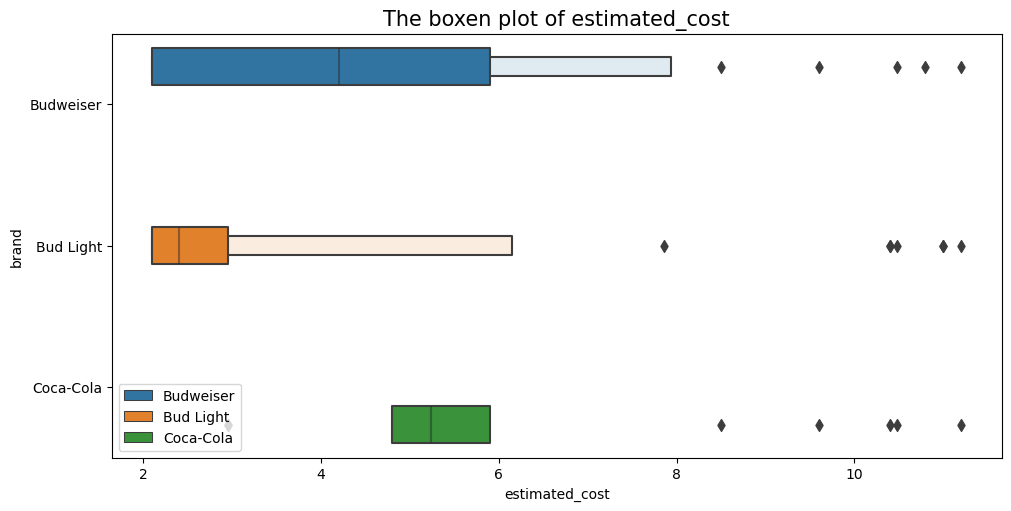

In [32]:
top3 =  (analysis.brand == "Bud Light")|(analysis.brand == "Budweiser")| (analysis.brand == "Coca-Cola")
top3 = analysis.loc[top3]
top3


def boxen_plots(df:pd.DataFrame,x:str):
    fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
    sns.boxenplot(data=df,y='brand',x=x,hue='brand')
    ax.set_title(f'The boxen plot of {x}',fontsize=15)
    


boxen_plots(top3,"estimated_cost")
plt.legend(loc='lower left')

In [33]:
condtion = (analysis.brand == 'Budweiser') & (analysis.estimated_cost >= 8)
analysis.loc[condtion]

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny,shows_product_quickly,patriotic,celebrity,danger,animals,uses_sex
185,2015,Budweiser,https://superbowl-ads.com/2015-budweiser-lost-...,https://www.youtube.com/watch?v=otCxSnu_HXA,60,8.500000,502254.0,2400.0,114.4375,0,1,1,0,1,1,0
193,2016,Budweiser,https://superbowl-ads.com/budweiser-2016-super...,https://www.youtube.com/watch?v=Le_2S2db0Bk,60,9.601562,150.0,0.0,111.8750,0,1,0,1,0,0,0
204,2017,Budweiser,https://superbowl-ads.com/2017-budweiser-super...,https://www.youtube.com/watch?v=HtBZvl7dIu4,60,10.796875,28795016.0,48000.0,111.3125,0,0,1,0,1,0,0
214,2018,Budweiser,https://superbowl-ads.com/41891-2/,https://www.youtube.com/watch?v=GNVw5f16GEM,60,10.476562,43500.0,162.0,103.3750,0,0,1,0,0,0,0
240,2020,Budweiser,https://superbowl-ads.com/2020-budweiser-typic...,https://www.youtube.com/watch?v=J0xugdotpp8,60,11.203125,1760.0,12.0,100.4375,0,1,1,1,1,0,0


Text(0.5, 1.0, 'Line plot')

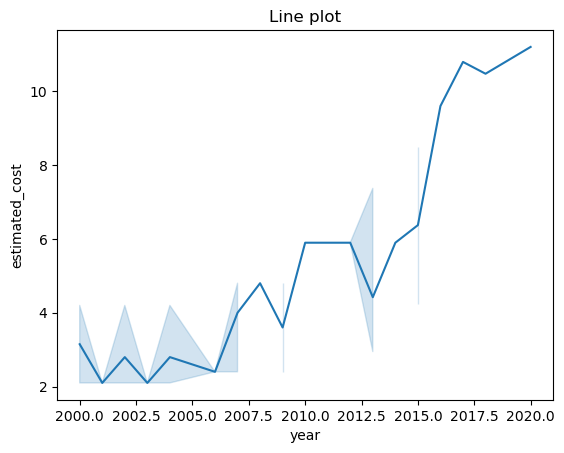

In [34]:
condtion = (analysis.brand == 'Budweiser')
sns.lineplot(data=analysis.loc[condtion,['brand','estimated_cost','year']],x='year',y='estimated_cost').set_title("Line plot")

In [35]:
(
    analysis.groupby("brand")['youtube_views'].sum()
        .to_frame("Total youtube_views by brand")
            .sort_values(by='Total youtube_views by brand',ascending=False)
                .reset_index()
)

,brand,Total youtube_views by brand
0,Doritos,225291936.0
1,Coca-Cola,40033252.0
2,NFL,39200956.0
3,Budweiser,38577836.0
4,Bud Light,19196800.0
5,Pepsi,3207752.0
6,Toyota,2815129.0
7,E-Trade,1790945.0
8,Hyundai,1301620.0
9,Kia,529784.0


**Observations**
- We can see that Doritos has te highest amount of youtube views compared to others and also ranks 7th in terms of total cost for its ads.
- Top three brands with high youtube views over the years are; Doritos, NFL and  Coca-Cola.
- Kia has the least amount of youtube views.
- Bud Light and Budweiser are in the top three high cost of ads but outside the top three spots in terms of youtube views.

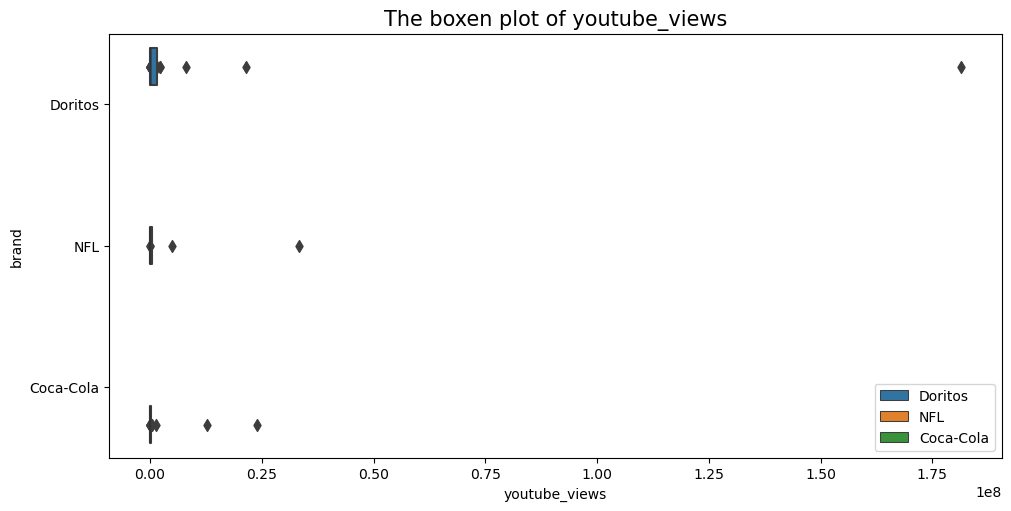

In [36]:
top3 =  (analysis.brand == "Doritos")|(analysis.brand == "Coca-Cola")|(analysis.brand == "NFL")
top3 = analysis.loc[top3]
top3

boxen_plots(top3,"youtube_views")
plt.legend(loc='lower right')

In [37]:
condtion = (analysis.brand == 'Doritos') & (analysis.youtube_views >= 25000000)
analysis.loc[condtion]

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny,shows_product_quickly,patriotic,celebrity,danger,animals,uses_sex
147,2012,Doritos,https://superbowl-ads.com/2012-doritos-sling-b...,https://www.youtube.com/watch?v=6SWNLDdnz0A,30,2.949219,181423808.0,295000.0,111.375,1,1,0,0,0,0,0


Text(0.5, 1.0, 'Line plot')

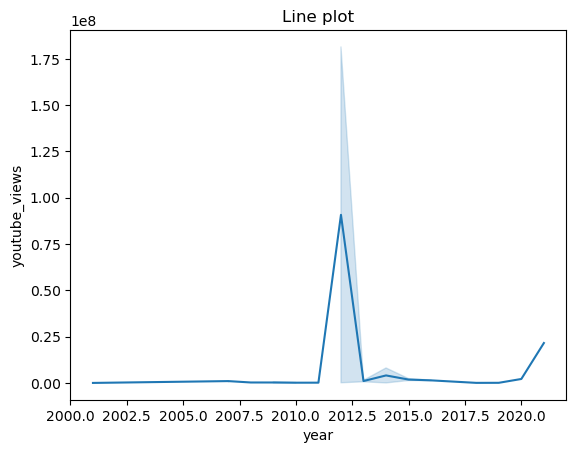

In [38]:
condtion = (analysis.brand == 'Doritos')
sns.lineplot(data=analysis.loc[condtion,['brand','youtube_views','year']],x='year',y='youtube_views').set_title("Line plot")

In [39]:
analysis.groupby("brand")['youtube_likes'].sum().to_frame("Total youtube_likes by brand").sort_values(by='Total youtube_likes by brand',ascending=False).reset_index()

,brand,Total youtube_likes by brand
0,Doritos,377364.000000
1,Coca-Cola,309093.000000
2,NFL,227488.000000
3,Bud Light,107769.000000
4,Budweiser,103740.914062
5,Toyota,19048.000000
6,Pepsi,17275.000000
7,Hyundai,6767.000000
8,Kia,3632.000000
9,E-Trade,2826.000000


**Observations**
- Doritos, Coca-Cola and NFL fall into the top three spots for youtube likes
- E-Trade has the lowest amount of youtube likes but ranks 8th in terms of youtbe views

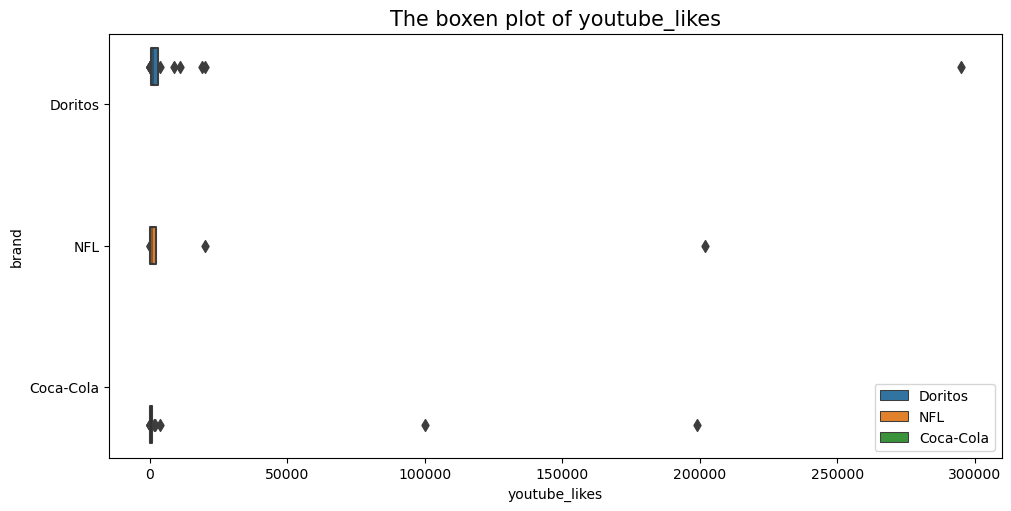

In [40]:
top3 =  (analysis.brand == "Doritos")|(analysis.brand == "NFL")| (analysis.brand == "Coca-Cola")
top3 = analysis.loc[top3]
top3

boxen_plots(top3,"youtube_likes")
plt.legend(loc='lower right')

In [41]:
condtion = (analysis.brand == 'Doritos') & (analysis.youtube_likes >= 50000)
analysis.loc[condtion]

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny,shows_product_quickly,patriotic,celebrity,danger,animals,uses_sex
147,2012,Doritos,https://superbowl-ads.com/2012-doritos-sling-b...,https://www.youtube.com/watch?v=6SWNLDdnz0A,30,2.949219,181423808.0,295000.0,111.375,1,1,0,0,0,0,0


Text(0.5, 1.0, 'Line plot')

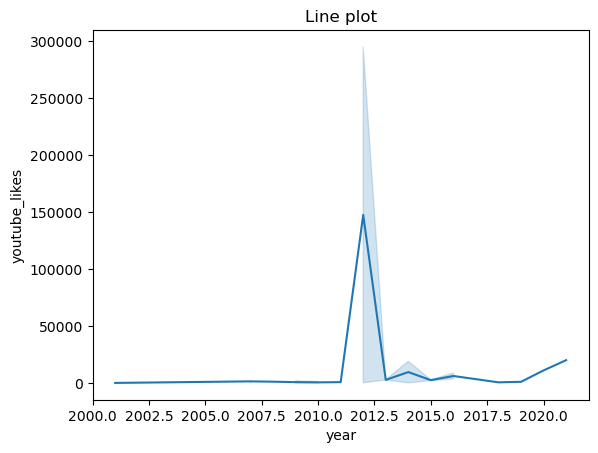

In [42]:
condtion = (analysis.brand == 'Doritos')
sns.lineplot(data=analysis.loc[condtion,['brand','youtube_likes','year']],x='year',y='youtube_likes').set_title("Line plot")

In [43]:
# Obtaining the total number of people that did not like the videos.
analysis["no_youtube_likes"] = analysis.youtube_views - analysis.youtube_likes
analysis.groupby("brand")['no_youtube_likes'].sum().to_frame("Total no_youtube_likes by brand").sort_values(by='Total no_youtube_likes by brand',ascending=True).reset_index()

,brand,Total no_youtube_likes by brand
0,Kia,526152.0
1,Hyundai,1294853.0
2,E-Trade,1788119.0
3,Toyota,2796081.0
4,Pepsi,3190477.0
5,Bud Light,19089030.0
6,Budweiser,38474096.0
7,NFL,38973468.0
8,Coca-Cola,39724160.0
9,Doritos,224914560.0


**Observations**
- Doritos, Coca-Cola and NFL have the highest amount of viewers that didn't like youtube with no likes
- Kia has the least amount followed by Hyundai and E-Trade.

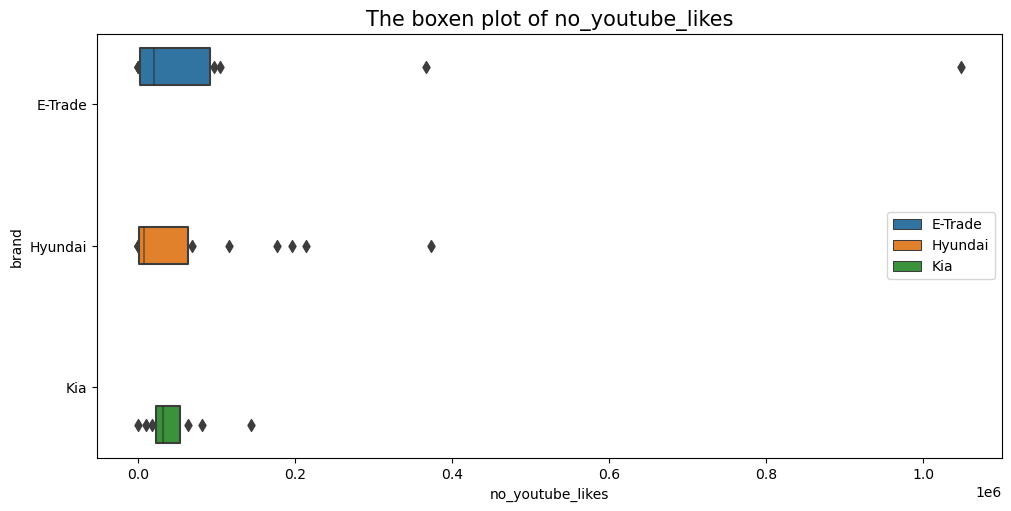

In [44]:
top3 =  (analysis.brand == "Kia")|(analysis.brand == "Hyundai")| (analysis.brand == "E-Trade")
top3 = analysis.loc[top3]
top3

boxen_plots(top3,"no_youtube_likes")
plt.legend(loc='center right')

In [45]:
no_likes = (analysis.no_youtube_likes >= 100000) & (analysis.no_youtube_likes <= 200000) 
condtion = (analysis.brand == 'Kia') & (no_likes)
analysis.loc[condtion,['brand','no_youtube_likes','year']]

,brand,no_youtube_likes,year
203,Kia,143869.0,2017


In [46]:
# no_likes = (analysis.no_youtube_likes >=0)
# condtion = (analysis.brand == 'Kia') & (no_likes)
# analysis.loc[condtion,['brand','no_youtube_likes','year']]

Text(0.5, 1.0, 'Line plot')

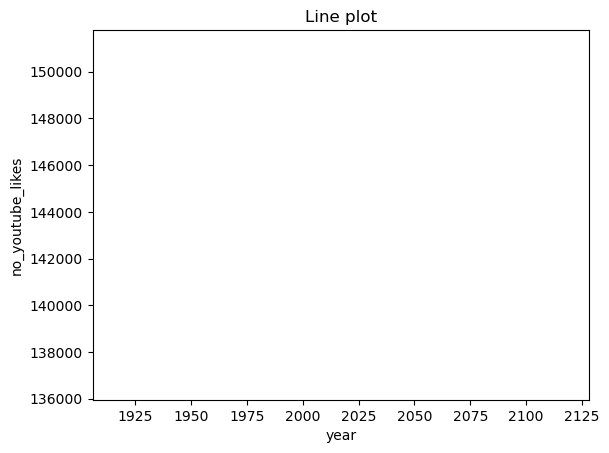

In [47]:
sns.lineplot(data=analysis.loc[condtion,['brand','no_youtube_likes','year']],x='year',y='no_youtube_likes').set_title("Line plot")

In [48]:
nums = analysis.select_dtypes(include=np.number)

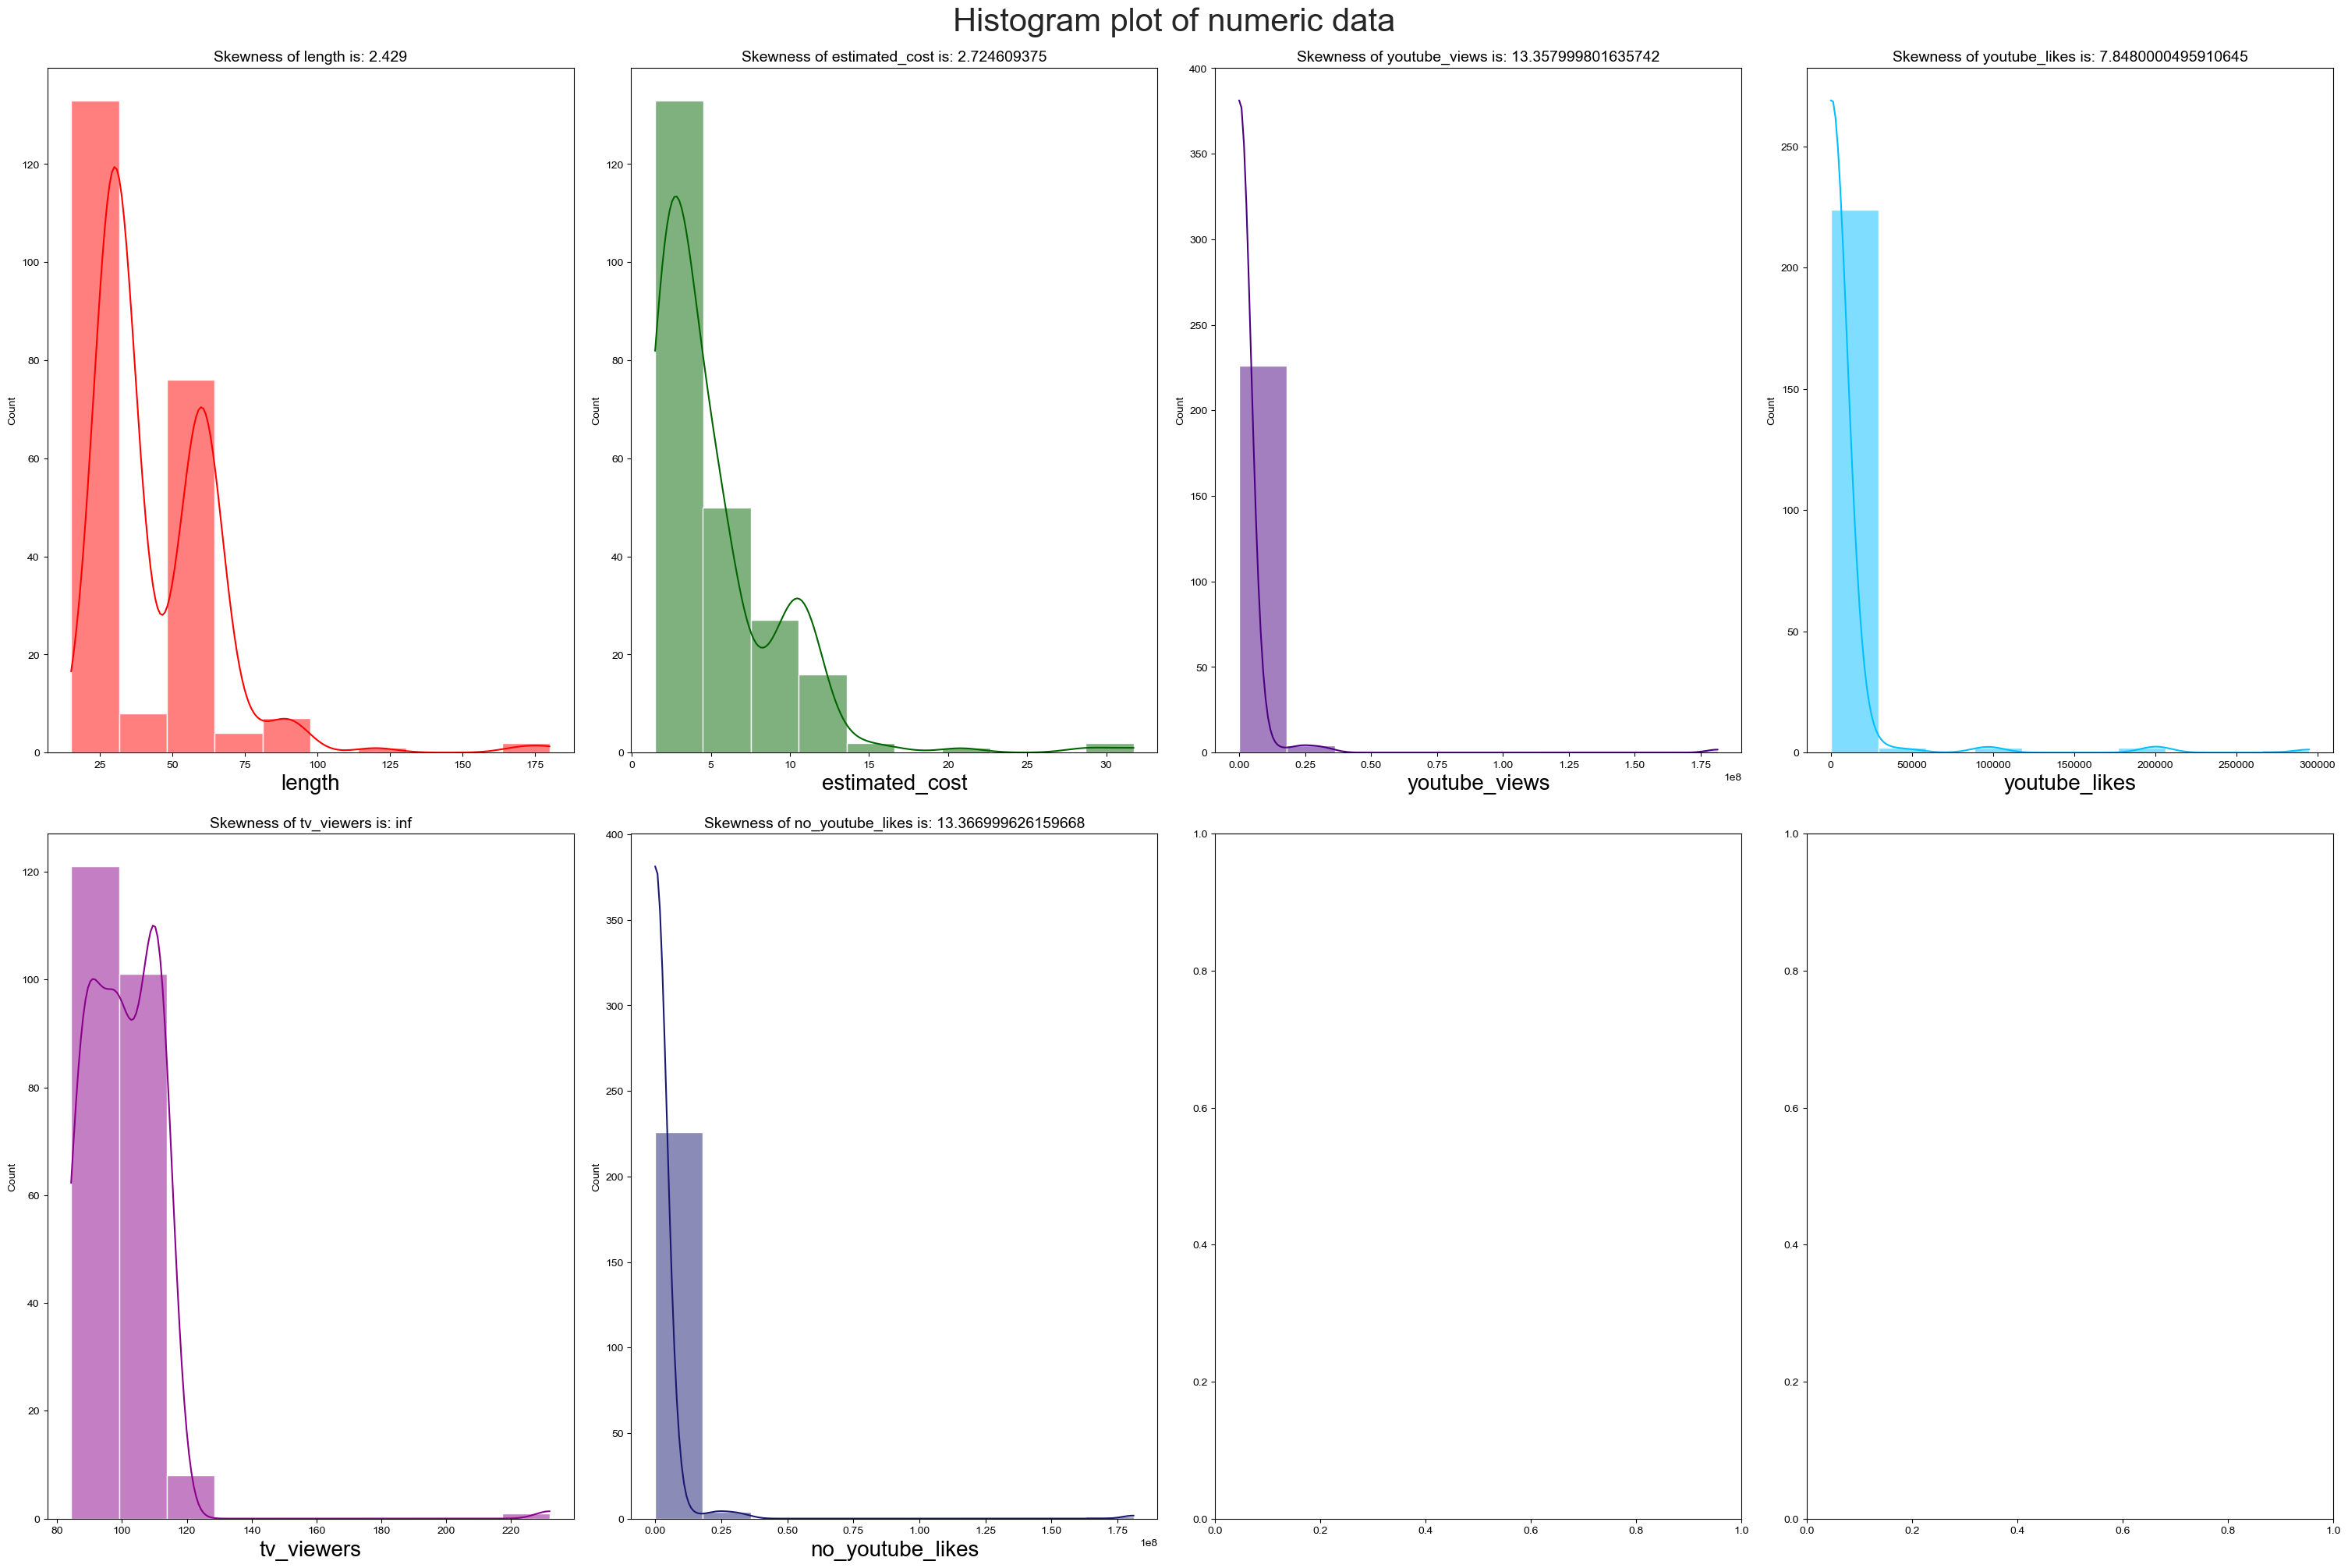

In [49]:
fig, ax = plt.subplots(2,4,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate']

excluded = ['year','funny', 'shows_product_quickly', 'patriotic','celebrity', 'danger', 'animals', 'uses_sex']
sns.set_theme(style='whitegrid')
for index,value in enumerate(nums.loc[:,~nums.columns.isin(excluded)]):
        sns.histplot(data=nums,x=value,kde=True,color=colors_list[index],ax=ax[index],bins=10)
        # ax[index].tick_params(axis='x', rotation=45)
        ax[index].set_xlabel(f"{value}", fontdict={'fontsize':20})
        ax[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0),3)}',fontsize=14)
        # ax[index].set_title(f'Histogram plot of {value}',fontsize=20)
        fig.suptitle("Histogram plot of numeric data",fontsize=30)
        

IQR value for column length is: 30.0
Lower bound value for column length is: -15.0
Upper bound value for column length is: 105.0
The number of values within the IQR for length is 214
The number of outliers beyond the upper bound for length is 3
The number of outliers below the lower bound for length is 0

IQR value for column estimated_cost is: 3.498046875
Lower bound value for column estimated_cost is: -2.8466796875
Upper bound value for column estimated_cost is: 11.1455078125
The number of values within the IQR for estimated_cost is 137
The number of outliers beyond the upper bound for estimated_cost is 14
The number of outliers below the lower bound for estimated_cost is 0

IQR value for column youtube_views is: 176876.0
Lower bound value for column youtube_views is: -257504.5
Upper bound value for column youtube_views is: 449999.5
The number of values within the IQR for youtube_views is 115
The number of outliers beyond the upper bound for youtube_views is 35
The number of outliers

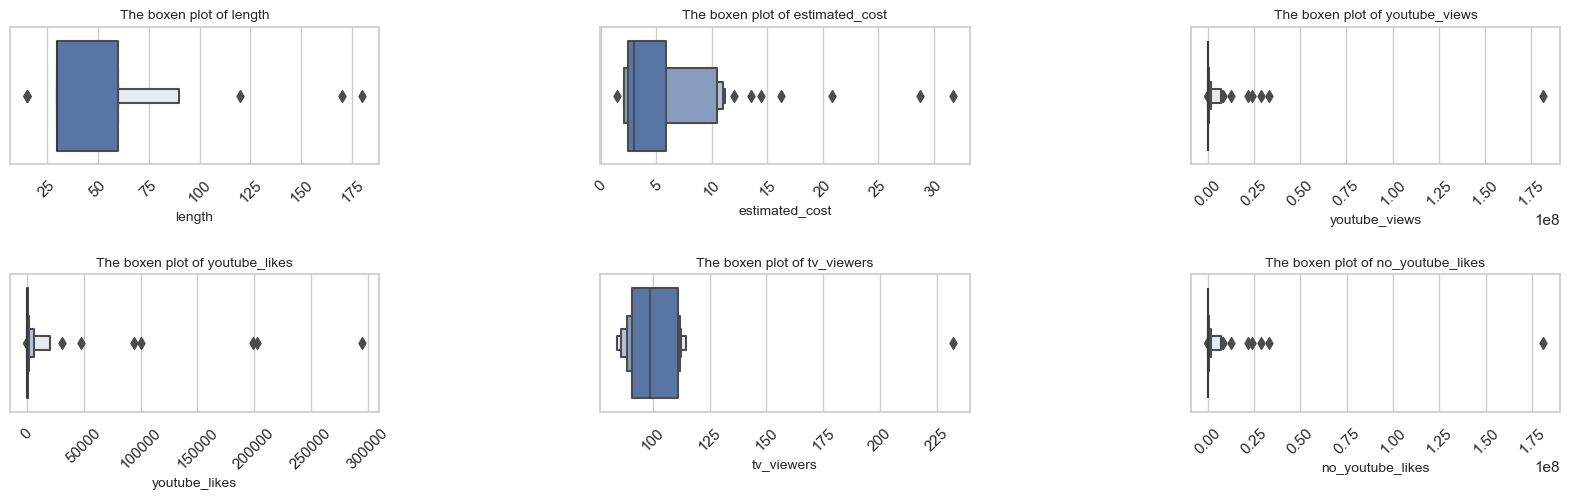

In [50]:
def outliers(data,col):
    Q_1 = np.quantile(data[col],0.25)
    Q_3 = np.quantile(data[col],0.75)
    IQR = Q_3 - Q_1 
    lower_bound = Q_1 - (1.5* IQR)
    upper_bound = Q_3 + (1.5* IQR)
    IQR_values = ((data[col] >= Q_1) & (data[col] <= Q_3)).sum()
    outliers_beyond_upper_bound = (data[col] > upper_bound).sum()
    outliers_below_lower_bound = (data[col]  < lower_bound).sum()
    print(f"IQR value for column {col} is: {IQR}")
    print(f"Lower bound value for column {col} is: {lower_bound}")
    print(f"Upper bound value for column {col} is: {upper_bound}")
    print(f"The number of values within the IQR for {col} is {IQR_values}")
    print(f"The number of outliers beyond the upper bound for {col} is {outliers_beyond_upper_bound}")
    print(f"The number of outliers below the lower bound for {col} is {outliers_below_lower_bound}\n")


excluded_nums = nums.loc[:,~nums.columns.isin(excluded)]
fig,ax = plt.subplots(2,3,figsize=(20,5),constrained_layout=True)
ax = ax.ravel()
for index,value in enumerate(excluded_nums):
    sns.boxenplot(data=excluded_nums,x=value,ax=ax[index])
    ax[index].set_title(f'The boxen plot of {value}',fontdict={'size':10})
    ax[index].tick_params(axis='x', rotation=45)
    ax[index].set_xlabel(f"{value}", fontdict={'fontsize':10})
    outliers(excluded_nums, value)
    plt.subplots_adjust(hspace=0.8, wspace=0.6)

In [51]:
# nums.loc[:,~nums.columns.isin(excluded)].columns
# analysis.brand.unique()

In [52]:
(analysis.groupby("brand")["length"].agg([("sum_in_mins","sum")])/60).reset_index()
# # seconds for Bud_light --> 1950
# # mins for Bud_light --> 32.5

,brand,sum_in_mins
0,Bud Light,32.500000
1,Budweiser,27.750000
2,Coca-Cola,19.000000
3,Doritos,14.500000
4,E-Trade,6.750000
5,Hyundai,16.000000
6,Kia,12.750000
7,NFL,13.333333
8,Pepsi,18.500000
9,Toyota,10.000000


In [53]:
# There are 31,536,000 seconds in one year and 525600 minutes in one year
# 31,536,000 seconds = 525600 minutes
# For brand in the year, we convert it to mins
# Y (minutes) = 525,600 * X seconds/ 31,536,000 seconds 
# Y (hours) = 8760 * X seconds/ 31,536,000 seconds 
def secs_to_mins(df,col="length"):
    return (((df[col].agg("sum")*525600 )/31536000))

def secs_to_hours(df,col="length"):
    return (((df[col].agg("sum")*8760 )/31536000))

In [54]:
analysis.groupby(["brand","year"])["length"].agg([("Total_ sum_in_secs","sum")])

Total_ sum_in_secs
brand     year                    
Bud Light 2000                  60
          2001                  90
          2002                 120
          2003                 180
          2004                 150
...                            ...
Toyota    2016                  90
          2018                 120
          2019                  60
          2020                  60
          2021                  60

[129 rows x 1 columns]

In [253]:
(
    (
        analysis.groupby(["brand","year"]).apply(secs_to_mins)
        .to_frame("Total runtime of ads in minutes")
        # .apply(np.ceil)
        # .sort_values(by='Total runtime of ads in minutes',ascending=False)
        .reset_index().to_csv("my_data/time_mins.csv",index=True)
        # .astype({"Total runtime of ads in minutes":"int8"})
    )
)

In [254]:
(
    (
        analysis.groupby(["brand","year"]).apply(secs_to_hours)
        .to_frame("Total runtime of ads in hours")
        # .apply(np.ceil)
        # .sort_values(by='Total runtime of ads in minutes',ascending=False)
        .reset_index().to_csv("my_data/time_hours.csv",index=True)
        # .astype({"Total runtime of ads in minutes":"int8"})
    )
)

**Observations**
- Seems like Doritos maintains videos of 1 minute or lower over the years; short, precise and straight to the point videos.
- That could be a reason towards their success rate with total number of likes over the years.

In [55]:
analysis.head(n=1)

,year,brand,superbowl_ads_link,youtube_link,length,estimated_cost,youtube_views,youtube_likes,tv_viewers,funny,shows_product_quickly,patriotic,celebrity,danger,animals,uses_sex,no_youtube_likes
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,30,2.099609,13615.0,84.0,88.5,1,1,0,0,0,1,0,13531.0


In [56]:
analysis.groupby(["year","brand"])['youtube_likes'].sum().to_frame("Total youtube_likes by brand").sort_values(by='year',ascending=True)

Total youtube_likes by brand
year brand                                  
2000 Bud Light                          11.0
     Budweiser                       31180.0
     E-Trade                           230.0
2001 Bud Light                         366.0
     Budweiser                         562.0
...                                      ...
2020 Toyota                            138.0
2021 Doritos                         20000.0
     E-Trade                             6.0
     Bud Light                        2933.0
     Toyota                          12000.0

[129 rows x 1 columns]

In [57]:
analysis.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int16)

In [58]:
frame = analysis.groupby(["year","brand"])['youtube_likes'].sum().to_frame("Total youtube_likes by brand").sort_values(by='year',ascending=True).reset_index()

year_list = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]



for year in year_list:
       condtion = ((frame.loc[((frame.year == year)) & 
                            (frame.brand.isin(["Doritos","NFL","Coca-Cola"])),
                            ["brand","Total youtube_likes by brand"]]).
                            sort_values(by="Total youtube_likes by brand", ascending=False))
       print("The Total youtube_likes by brand for {} \n {}\n".format(year,condtion))

The Total youtube_likes by brand for 2000 
 Empty DataFrame
Columns: [brand, Total youtube_likes by brand]
Index: []

The Total youtube_likes by brand for 2001 
      brand  Total youtube_likes by brand
5  Doritos                          15.0

The Total youtube_likes by brand for 2002 
 Empty DataFrame
Columns: [brand, Total youtube_likes by brand]
Index: []

The Total youtube_likes by brand for 2003 
    brand  Total youtube_likes by brand
12   NFL                          43.0

The Total youtube_likes by brand for 2004 
 Empty DataFrame
Columns: [brand, Total youtube_likes by brand]
Index: []

The Total youtube_likes by brand for 2005 
 Empty DataFrame
Columns: [brand, Total youtube_likes by brand]
Index: []

The Total youtube_likes by brand for 2006 
 Empty DataFrame
Columns: [brand, Total youtube_likes by brand]
Index: []

The Total youtube_likes by brand for 2007 
         brand  Total youtube_likes by brand
25    Doritos                        2755.0
29  Coca-Cola               

**Observations**

Among the three companies (Doritos, Coca-Cola and NFL) that have the highest youtube likes:
- In the year 2001, Doritos was the only company present **with 15 likes.**
- In the year 2003, NFL was the only company present **with 43 likes.**
- In the year 2007, Doritos and Coca-Cola were present **with Doritos having the highest likes; 2755.**
- In the year 2008, Doritos and Coca-Cola were present **with Doritos having the highest likes; 1100.**
- In the year 2009, Doritos and Coca-Cola were present **with Coca-Cola having the highest likes; 5302.**
- In the year 2010, Doritos and NFL were present **with Doritos having the highest likes; 1502.**
- In the year 2011, Doritos and Coca-Cola were present **with Doritos having the highest likes; 697.**
- In the year 2012, Doritos, Coca-Cola and NFL were present **with Doritos having the highest likes; 295160.**
- In the year 2013, Doritos was the only company present **with 5400 likes.**
- In the year 2014, Doritos and Coca-Cola were present **with Doritos having the highest likes; 19040.**
- In the year 2015, Doritos and Coca-Cola were present **with Doritos having the highest likes; 4900.**
- In the year 2016, Doritos, Coca-Cola and NFL were present **with Coca-Cola  having the highest likes; 199000.**
- In the year 2017, NFL was the only company present **with 2298 likes.**
- In the year 2018, Doritos, Coca-Cola and NFL were present **with Coca-Cola having the highest likes; 811.**
- In the year 2019, Doritos, Coca-Cola and NFL were present **with Doritos having the highest likes; 1000.**
- In the year 2020, Doritos, Coca-Cola and NFL were present **with NFL having the highest likes; 202000.**
- In the year 2021, Doritos was the only company present **with 20000 likes.**

In [59]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
brands = analysis.groupby("brand")


def categories_count_values(df,category:str):
    return(df[category].value_counts().to_frame(f"{category}_total_count")).sort_values(by=[f'{category}',f"{category}_total_count"], ascending=False).reset_index()
        

In [60]:
categories_count_values(brands,'funny')

,brand,funny,funny_total_count
0,Bud Light,1,53
1,Doritos,1,24
2,Budweiser,1,19
3,Pepsi,1,17
4,E-Trade,1,13
5,Hyundai,1,12
6,Coca-Cola,1,8
7,Kia,1,8
8,Toyota,1,6
9,NFL,1,2


**Observations**
- In terms of funny videos, Bud Light, Doritos and Budweiser has the highest value counts with Bud Light coming in first

In [61]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
categories_count_values(brands,'shows_product_quickly')

,brand,shows_product_quickly,shows_product_quickly_total_count
0,Bud Light,1,46
1,Budweiser,1,24
2,Doritos,1,22
3,Coca-Cola,1,15
4,Pepsi,1,14
5,Hyundai,1,12
6,Toyota,1,8
7,E-Trade,1,7
8,NFL,1,5
9,Kia,1,4


**Observations**
- In terms of shows_product_quickly videos, Bud Light, Doritos and Budweiser has the highest value counts with Bud Light coming in first

In [62]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
categories_count_values(brands,'patriotic')

,brand,patriotic,patriotic_total_count
0,Budweiser,1,13
1,Coca-Cola,1,5
2,NFL,1,4
3,Hyundai,1,3
4,Pepsi,1,3
5,Toyota,1,3
6,E-Trade,1,2
7,Bud Light,1,1
8,Doritos,1,1
9,Kia,1,1


**Observations**
- In terms of patriotic videos, Budweiser, Coca-Cola and NFL has the highest value counts with Budweiser coming in first

In [63]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
categories_count_values(brands,'celebrity')

,brand,celebrity,celebrity_total_count
0,Pepsi,1,15
1,Bud Light,1,12
2,Kia,1,7
3,NFL,1,7
4,Coca-Cola,1,6
5,Hyundai,1,6
6,Budweiser,1,5
7,Doritos,1,5
8,Toyota,1,2
9,E-Trade,1,1


**Observations**
- In terms of celebrity videos, Pepsi, Bud Light and Kia has the highest value counts with Pepsi coming in first

In [64]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
categories_count_values(brands,'danger')

,brand,danger,danger_total_count
0,Bud Light,1,28
1,Doritos,1,11
2,Budweiser,1,7
3,Coca-Cola,1,6
4,Hyundai,1,6
5,Pepsi,1,6
6,Kia,1,5
7,Toyota,1,4
8,E-Trade,1,3
9,Budweiser,0,30


**Observations**
- In terms of danger videos, Bud Light, Doritos and Budweiser has the highest value counts with Bud Light coming in first

In [65]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
categories_count_values(brands,'animals')

,brand,animals,animals_total_count
0,Bud Light,1,19
1,Budweiser,1,19
2,Coca-Cola,1,12
3,Doritos,1,11
4,Hyundai,1,7
5,E-Trade,1,4
6,Kia,1,4
7,Pepsi,1,3
8,Toyota,1,3
9,Bud Light,0,37


**Observations**
- In terms of danger videos, Bud Light, Budweiser and Coca-Cola has the highest value counts with Bud Light coming in first

In [66]:
categories = [
                'funny', 'shows_product_quickly', 'patriotic',
                'celebrity', 'danger', 'animals', 
                'uses_sex']
categories_count_values(brands,'uses_sex')

,brand,uses_sex,uses_sex_total_count
0,Bud Light,1,20
1,Pepsi,1,11
2,Budweiser,1,7
3,Kia,1,6
4,Doritos,1,5
5,E-Trade,1,3
6,Hyundai,1,3
7,Coca-Cola,1,1
8,Toyota,1,1
9,Bud Light,0,36


**Observations**
- In terms of uses_sex videos, Bud Light, Pepsi and Budweiser has the highest value counts with Bud Light coming in first

The countplots below confirm mmy statements

In [67]:
def plotting_count(x:str,hue:str):    
    try:
        fig, ax = plt.subplots(figsize=(20,5))
        sns.set_theme(style='darkgrid')

        ordering = analysis[x].value_counts()
        my_palette = sns.color_palette('bright')
        sns.countplot(data=analysis, x=x, hue=hue,palette=my_palette,
        order=ordering.sort_values().index[::-1], # descending order
        )
        ax.tick_params(axis='x', rotation=45)
        ax.set_title(f'Count plot of number of {x} with {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            analysis.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            analysis.info(memory_usage='deep')

# plotting_count("brand",'funny')

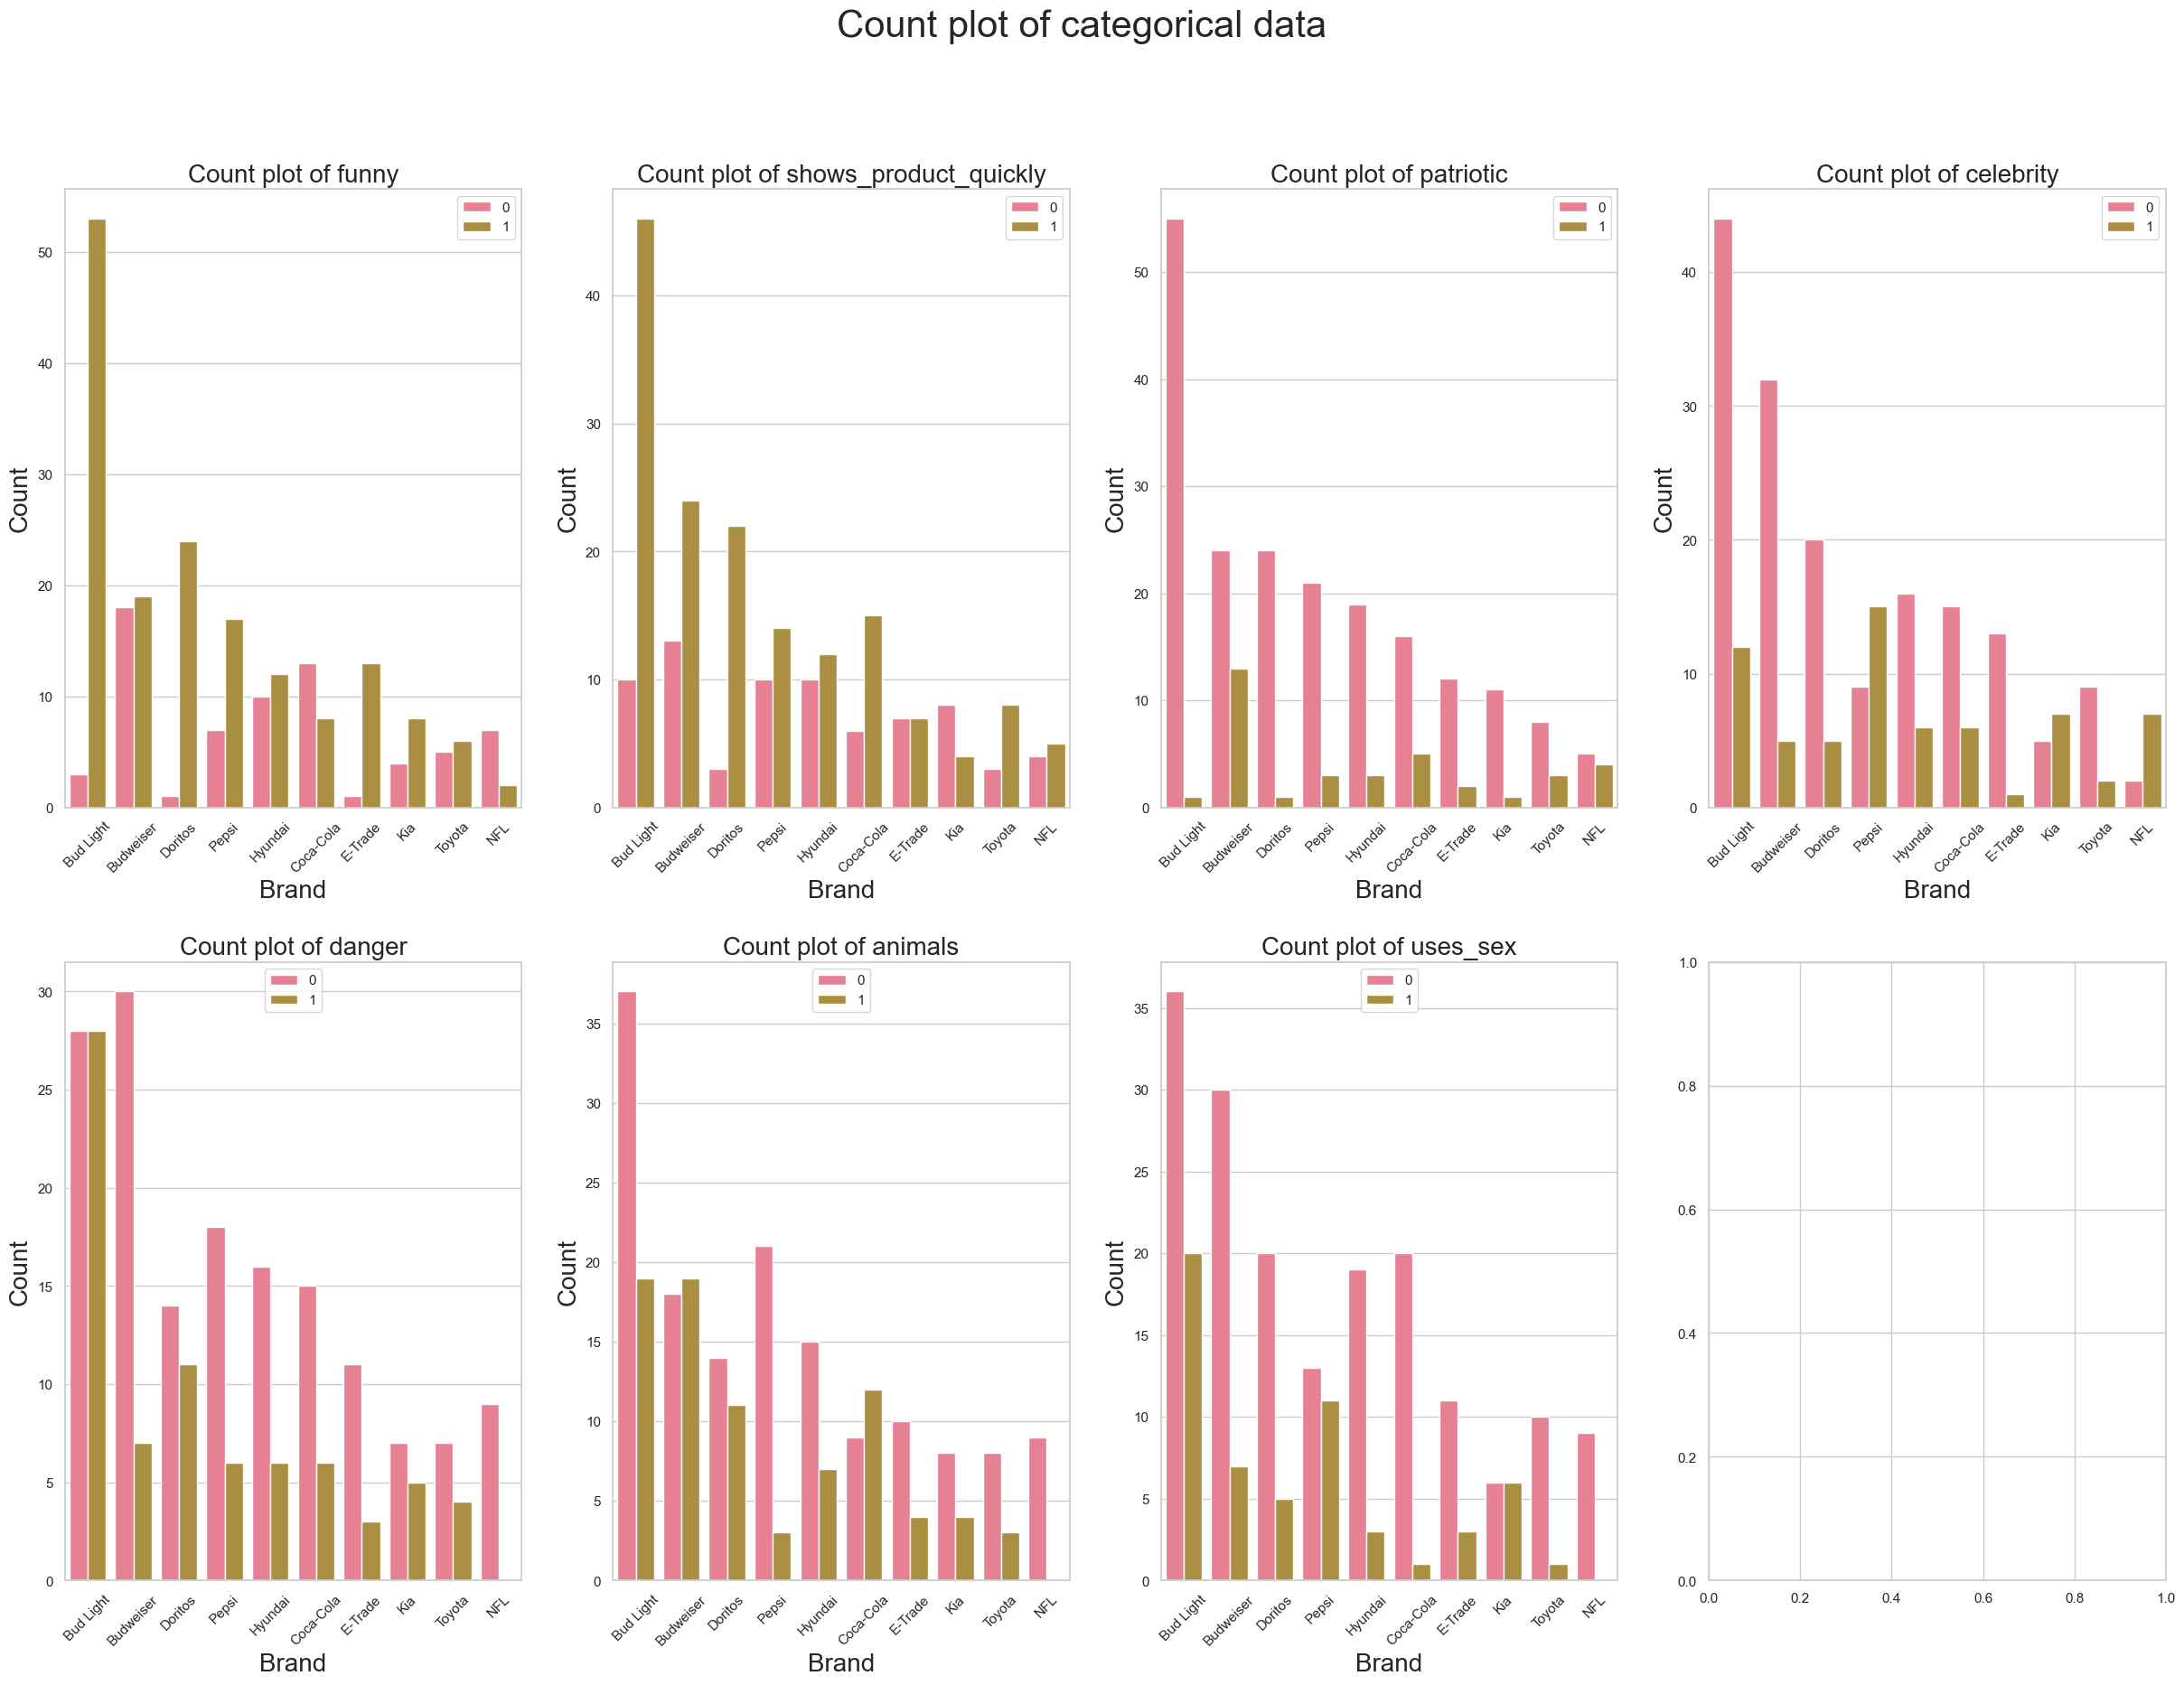

In [68]:
# nums
fig, ax = plt.subplots(2,4,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate']
bins_spec = [15,'auto',50,15,20,20,'auto',10]
sns.set_theme(style='whitegrid', palette="husl")
for index,value in enumerate(categories):
        ordering = analysis['brand'].value_counts()
        sns.countplot(data=analysis,x='brand',hue=value,ax=ax[index], 
                        order=ordering.sort_values().index[::-1])
        ax[index].tick_params(axis='x', rotation=45)
        ax[index].set_xlabel(f"Brand", fontdict={'fontsize':20})
        ax[index].set_ylabel(f"Count", fontdict={'fontsize':20})
        ax[index].set_title(f'Count plot of {value}',fontsize=20)
        fig.suptitle("Count plot of categorical data",fontsize=30)
        plt.subplots_adjust(hspace=0.25)
        ax[index].legend()
        # print(value)
        

I believe Doritos success could be the fact that they use funny and videos and shows their product quickly

In [69]:
analysis.columns

Index(['year', 'brand', 'superbowl_ads_link', 'youtube_link', 'length',
       'estimated_cost', 'youtube_views', 'youtube_likes', 'tv_viewers',
       'funny', 'shows_product_quickly', 'patriotic', 'celebrity', 'danger',
       'animals', 'uses_sex', 'no_youtube_likes'],
      dtype='object')

In [70]:
# Refer to page 216 of Pandas 1.x Cookbook Practical recipes for 
# scientific computing, time series analysis,
# and exploratory data analysis using Python

pearson_corr = analysis.corr()

cond_one = pearson_corr>=.4
cond_two = pearson_corr<=-.3
cond_final = (cond_one|cond_two)
filtered_correlation = pearson_corr[cond_final]

In [71]:
# filtered_correlation

<AxesSubplot:>

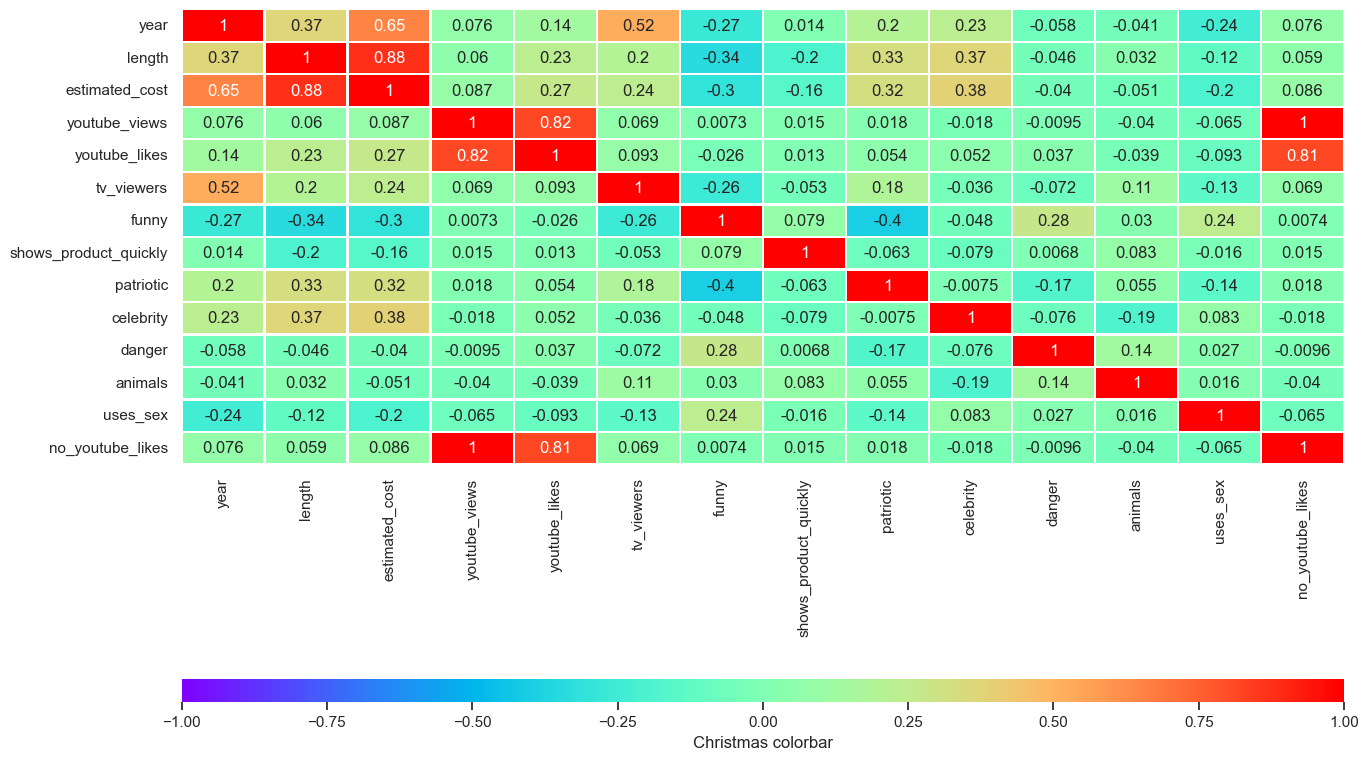

In [72]:
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.9}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)


sns.heatmap(analysis.corr(),
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

# Plot-15

<AxesSubplot:>

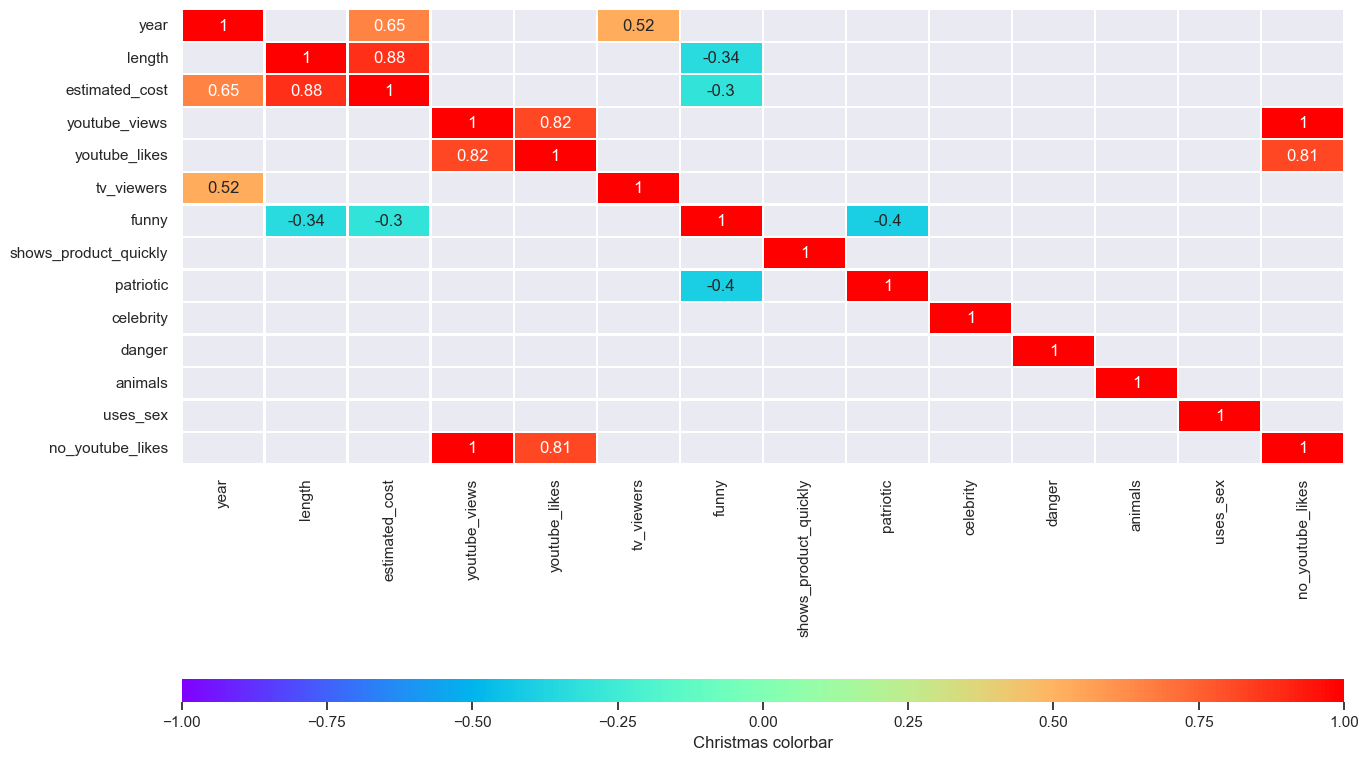

In [75]:
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.9}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)


sns.heatmap(filtered_correlation,
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

# Plot-15

In [76]:
analysis.columns

Index(['year', 'brand', 'superbowl_ads_link', 'youtube_link', 'length',
       'estimated_cost', 'youtube_views', 'youtube_likes', 'tv_viewers',
       'funny', 'shows_product_quickly', 'patriotic', 'celebrity', 'danger',
       'animals', 'uses_sex', 'no_youtube_likes'],
      dtype='object')

**Observations**
- Year has a strong positive correlation with estimated_cost and tv_viewers.
- Length has a strong positive correlation with estimated_cost.
- Youtube views has a strong positive correlation with youtube likes and no youtube likes.
- Youtube likes has a strong positive correlation with no youtube likes.
- Funny has a negative correlation with Patriotic, length & estimated_cost which is quite strong.

The lineplots below confirm the statemtents and heatmap

In [77]:
def line_plots(x:str,y:str):
    try:
        sns.set_theme(style='whitegrid',palette='husl')
        fig,ax = plt.subplots(figsize=(9,5))
        sns.lineplot(data=analysis,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontsize=14)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        analysis.info(memory_usage='deep')

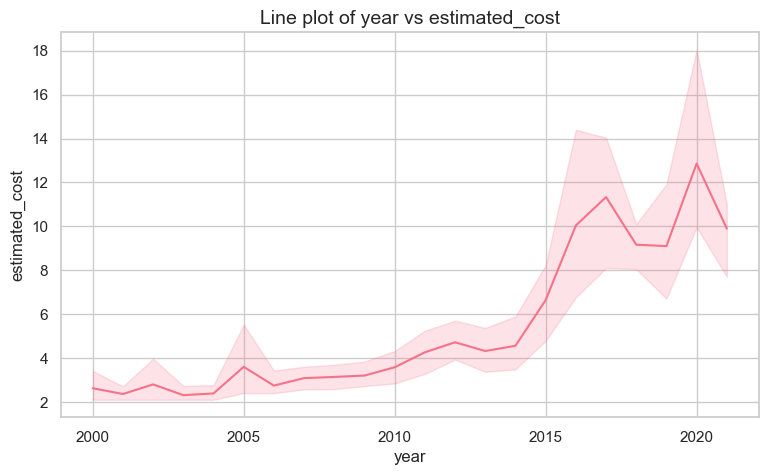

In [78]:
line_plots("year","estimated_cost")

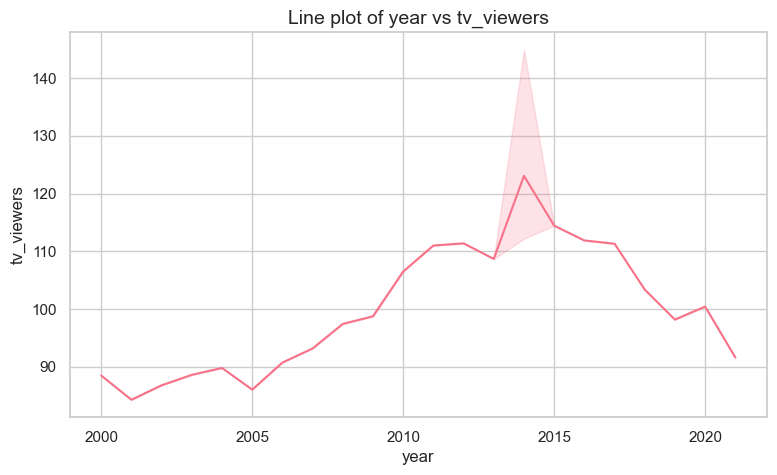

In [79]:
line_plots("year","tv_viewers")

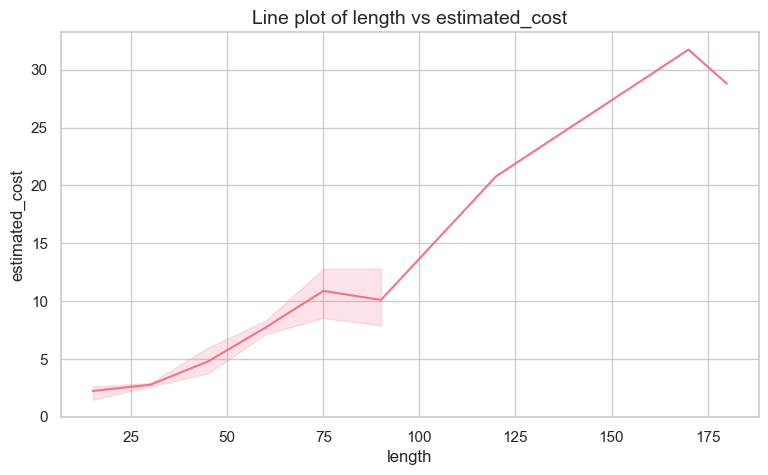

In [80]:
line_plots("length","estimated_cost")

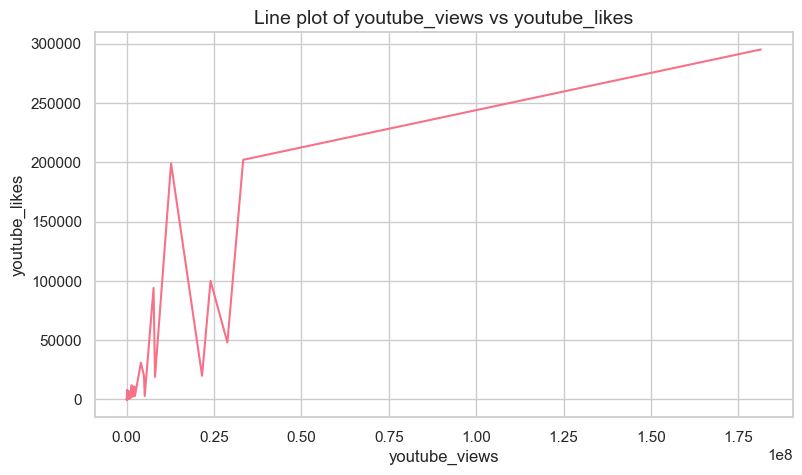

In [81]:
line_plots("youtube_views","youtube_likes")

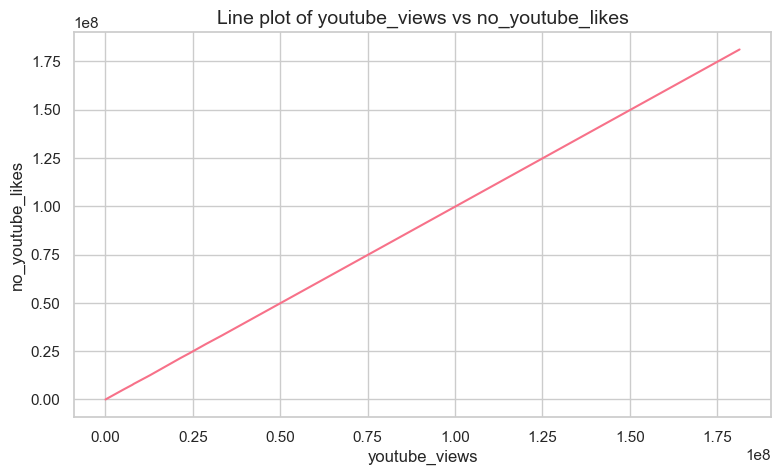

In [82]:
line_plots("youtube_views","no_youtube_likes")

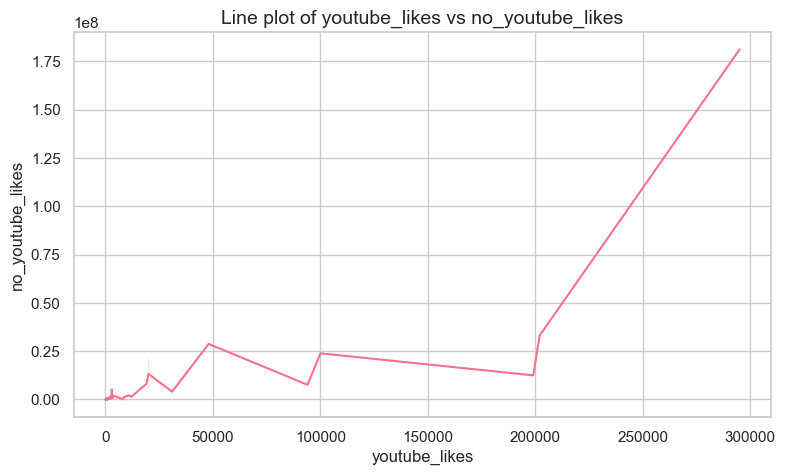

In [83]:
line_plots("youtube_likes","no_youtube_likes")

In [548]:
analysis.to_csv("my_data/analysis.csv",index=False)

### **Conclusion**


- From the observations and taking into account of Youtube likes and views, Doritos is the most successful among the rest as the estimated cost of running its ads is relative low compared to the top spender like Budweiser, Bud Light & Coca-Cola whose. 
- Investors could make a solid profit with minimum cost on Doritos.
